In [1]:
import os
import sys
sys.path.append('/home/g/Desktop/git/nodules/src/')
sys.path.append('/home/g/Desktop/git/nodules/keras/')
sys.path.append('/home/g/Desktop/git/nodules/tf/')

import init
import kerasUtil as ku
import tan

import scipy
import scipy.ndimage
import scipy.misc as scipy_misc
import numpy as np

import matplotlib.pyplot as plt

ImportError: No module named init

In [163]:
cfg = ['/scr/nodules/no4/val/bin4/','/scr/nodules/no4/samples/val/']
images, labels = init.loadpng(cfg)
#images, labels = init.loadData(cfg)
print len(images)
images, labels = ku.cleanData(images,labels)
testImages = ku.to3d(images,2)
testLabels = ku.get3Labels(labels)

214


In [164]:
print len(labels)
print len(images)

175
175


In [165]:
print labels

['SSSS', 'SSSS', 'SSSS', 'LLLL', 'LLL', 'LLLL', 'LLLL', 'SSS', 'SSS', 'SSS', 'SSSS', 'SSSS', 'SSS', 'LLLL', 'SSS', 'SSSS', 'SSS', 'LLL', 'LLLL', 'SSS', 'SSSS', 'LLLL', 'SSSS', 'LLLL', 'SSSS', 'SSSS', 'LLLL', 'LLLL', 'LLLL', 'SSS', 'LLLL', 'SSSS', 'SSSS', 'SSS', 'SSS', 'LLLL', 'SSSS', 'LLLL', 'SSS', 'SSS', 'SSSS', 'LLLL', 'SSSS', 'SSSS', 'LLLL', 'SSS', 'SSS', 'SSS', 'LLLL', 'SSSS', 'SSSS', 'SSS', 'SSS', 'SSSS', 'SSS', 'LLLL', 'LLLL', 'SSS', 'SSSS', 'SSS', 'LLLL', 'SSSS', 'SSS', 'LLLL', 'LLLL', 'SSS', 'SSS', 'SSSS', 'SSS', 'LLLL', 'LLLL', 'SSSS', 'LLLL', 'SSS', 'SSS', 'SSSS', 'SSS', 'SSS', 'SSSS', 'SSSS', 'SSSS', 'SSSS', 'SSS', 'SSSS', 'SSS', 'SSSS', 'SSSS', 'LLLL', 'SSS', 'LLL', 'SSSS', 'LLLL', 'SSS', 'LLL', 'SSS', 'LLLL', 'SSS', 'LLLL', 'SSSS', 'SSSS', 'SSSS', 'SSSS', 'LLLL', 'LLLL', 'SSSS', 'SSS', 'SSS', 'SSS', 'LLLL', 'SSS', 'LLLL', 'LLL', 'SSSS', 'SSS', 'SSSS', 'LLLL', 'SSS', 'SSSS', 'LLL', 'SSSS', 'LLLL', 'LLLL', 'SSS', 'LLLL', 'LLLL', 'LLLL', 'SSSS', 'LLLL', 'LLLL', 'LLL', 'LLLL',

In [166]:
img0 = testImages[0]
img1 = testImages[3]
img2 = testImages[4]
img3 = testImages[5]
img4 = testImages[6]

In [6]:
def DNG(L):
  #t1 = time.time()
  dL = np.gradient(L)
  l2dL = np.sqrt(np.multiply(dL[0],dL[0])+np.multiply(dL[1],dL[1])+np.multiply(dL[2],dL[2]))
  w = np.divide(dL,l2dL)
  print w.shape
  dvg = np.zeros(L.shape)
  dwx, dwy, dwz = np.zeros(L.shape),np.zeros(L.shape),np.zeros(L.shape)
  for i in range(1,w[0].shape[0]-1):
    dwx[i,:,:] = (w[0][i+1,:,:]-w[0][i-1,:,:])/2.
  for j in range(1,w[1].shape[1]-1):
    dwy[:,j,:] = (w[1][:,j+1,:]-w[1][:,j-1,:])/2.
  for k in range(1,w[2].shape[2]-1):
    dwz[:,:,k] = (w[2][:,:,k+1]-w[2][:,:,k-1])/2.
  #dvg = dvg-dwx-dwy-dwz
  dvg = dwx+dwy+dwz
  #t2 = time.time()
  #print "Time: " + str(t2-t1)
  return dvg

In [7]:
def Hessian(L):
  #t1 = time.time()
  hessian = np.zeros((L.ndim,L.ndim)+L.shape,dtype=L.dtype)
  dL = np.gradient(L)
  for i, d1 in enumerate(dL):
    d2L = np.gradient(d1)
    for j, d2 in enumerate(d2L):
      hessian[i,j,:,:] = d2
  #t2 = time.time()
  #print 'Time: ' + str(t2-t1)
  return hessian

In [132]:
def getScales(opts):
  d0, d1, no = 1., 4., 6
  sigma = []
  sigma.append(d0/4.)
  for i in range(1, no):
    val = ((d1/d0)**(1./(no-1.)))**i*sigma[0]
    sigma.append(val)
  print sigma
  return sigma

In [133]:
def altDNG(L):
  #t1 = time.time()
  dL = np.gradient(L)
  l2dL = np.sqrt(np.multiply(dL[0],dL[0])+np.multiply(dL[1],dL[1])+np.multiply(dL[2],dL[2]))
  w = np.divide(dL,l2dL)
  print w.shape
  #hess = Hessian(L)
  #dLT = np.transpose(dL)
  #dL2 = np.multiply(dL,dL)
  #dL3 = np.multiply(dL2,np.absolut(dL))
  #trHess = 
  dvg = np.zeros(L.shape)
  dwx, dwy, dwz = np.zeros(L.shape),np.zeros(L.shape),np.zeros(L.shape)
  for i in range(1,w[0].shape[0]-1):
    dwx[i,:,:] = (w[0][i+1,:,:]-w[0][i-1,:,:])/2.
    dwy[i,:,:] = (w[1][i+1,:,:]-w[1][i-1,:,:])/2.
    dwz[i,:,:] = (w[2][i+1,:,:]-w[2][i-1,:,:])/2.
  for j in range(1,w[1].shape[1]-1):
    dwx[:,j,:] += (w[0][:,j+1,:]-w[0][:,j-1,:])/2.
    dwy[:,j,:] += (w[1][:,j+1,:]-w[1][:,j-1,:])/2.
    dwz[:,j,:] += (w[2][:,j+1,:]-w[2][:,j-1,:])/2.
  for k in range(1,w[2].shape[2]-1):
    dwx[:,:,k] += (w[0][:,:,k+1]-w[0][:,:,k-1])/2.
    dwy[:,:,k] += (w[1][:,:,k+1]-w[1][:,:,k-1])/2.
    dwz[:,:,k] += (w[2][:,:,k+1]-w[2][:,:,k-1])/2.
  dvg = dvg-dwx-dwy-dwz
  #dvg = dwx+dwy+dwz
  #t2 = time.time()
  #print "Time: " + str(t2-t1)
  return dvg

In [178]:
def dng(image, opts):
  scales = getScales(opts)
  nodules = []
  for sig in scales:
    img = np.zeros(image.shape)
    for i in range(16):
      img[i,:,:] = scipy.ndimage.filters.gaussian_filter(image[i,:,:], sigma=sig, order=0)
    #print img
    #dng = tan.__dng__(img)
    dng = altDNG(img)
    #dng = altDNG(img)
    #dng[np.isnan(dng)] = 110
    #dng[np.isinf(dng)] = 110
    print "MAX " + str(np.ndarray.max(dng))
    dng = np.where(dng>=2.0,1,0)
    print "SUM " + str(np.sum(dng))
    nodules.append(np.uint8(dng))
    #print dng
  return nodules

In [179]:
print img1.shape
print img1.dtype

(16, 32, 32)
float64


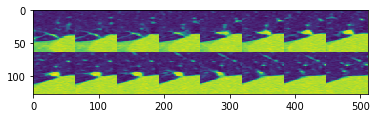

In [191]:
plt.imshow(images[6])
plt.show()

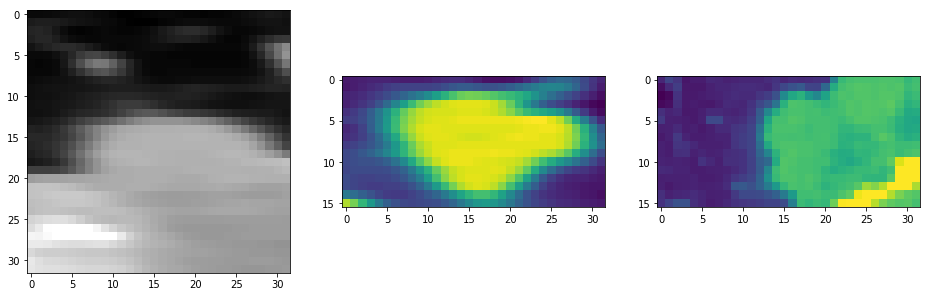

In [190]:
img = img3
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(img[8,:,:],cmap='gray')
plt.subplot(132)
plt.imshow(img[:,16,:])
plt.subplot(133)
plt.imshow(img[:,:,16])
plt.show()

In [188]:
opts = None
import copy
image = copy.deepcopy(img)
cands = dng(image, opts)


[0.25, 0.32987697769322355, 0.435275281648062, 0.5743491774985174, 0.7578582832551989, 0.9999999999999998]
(3, 16, 32, 32)
MAX 4.62853474811
SUM 1210
(3, 16, 32, 32)
MAX 4.62911412745
SUM 1186
(3, 16, 32, 32)
MAX 4.63092506059
SUM 1125
(3, 16, 32, 32)
MAX 4.65832128707
SUM 1022
(3, 16, 32, 32)
MAX 4.73360820931
SUM 873
(3, 16, 32, 32)
MAX 4.75148182763
SUM 725


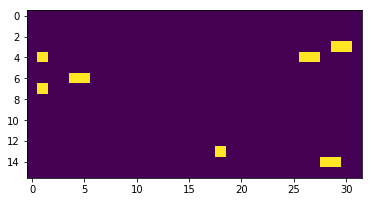

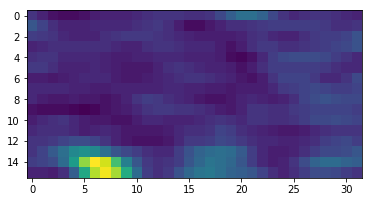

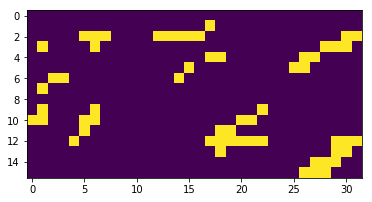

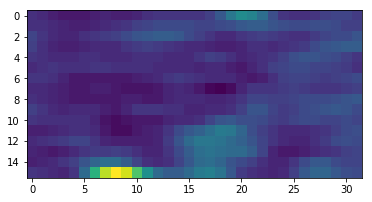

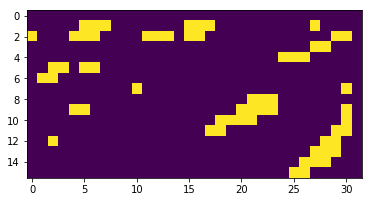

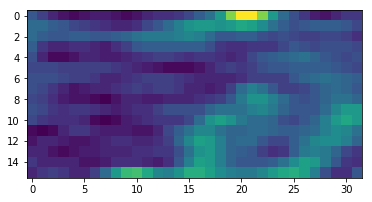

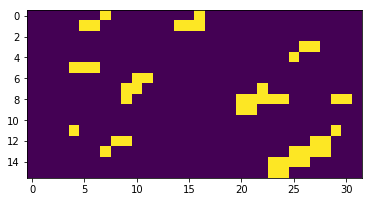

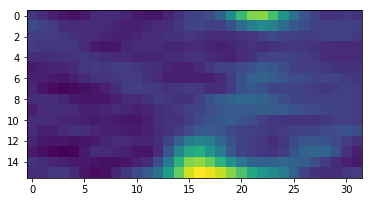

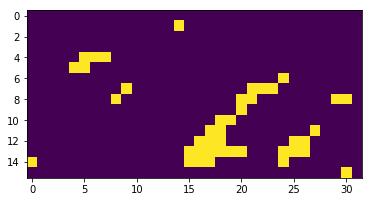

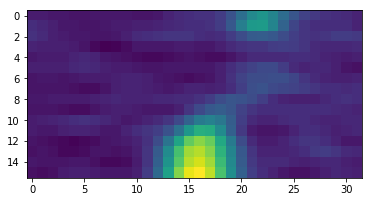

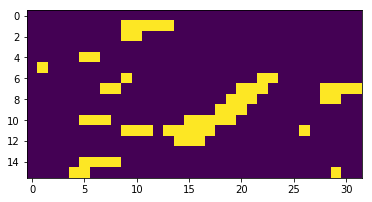

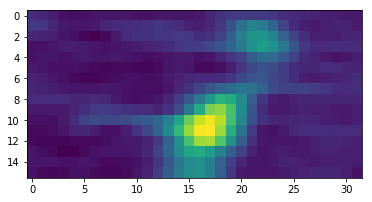

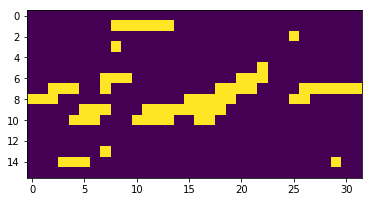

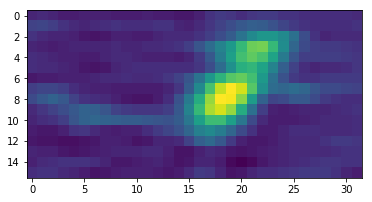

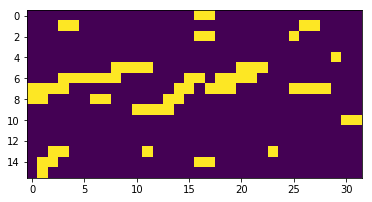

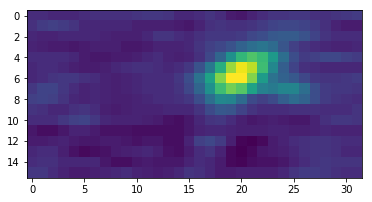

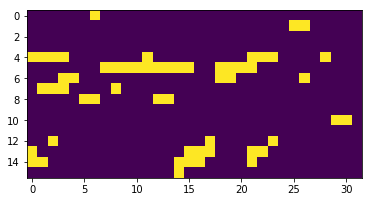

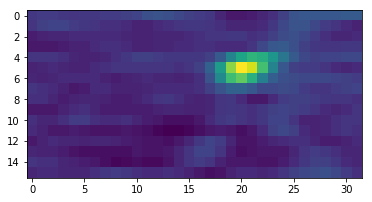

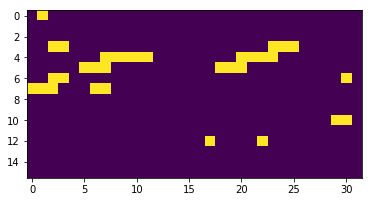

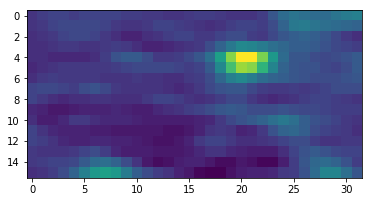

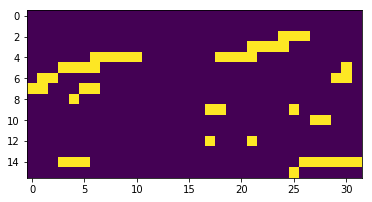

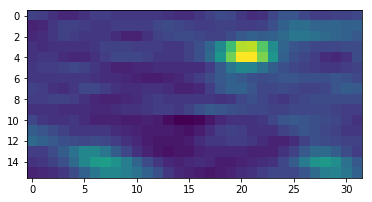

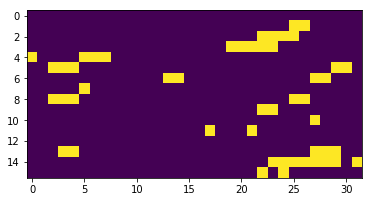

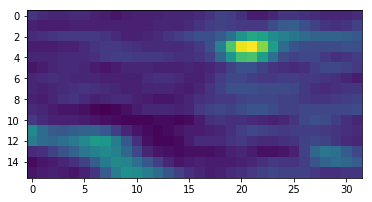

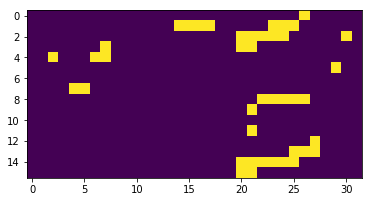

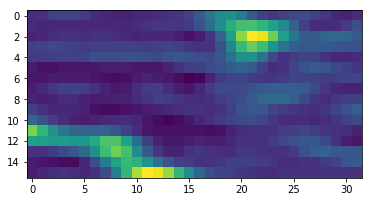

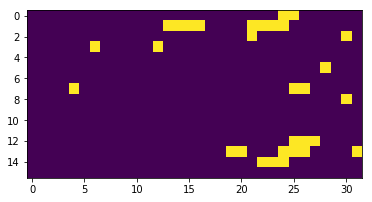

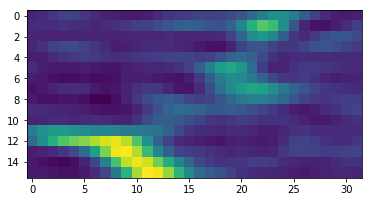

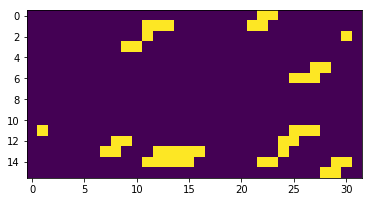

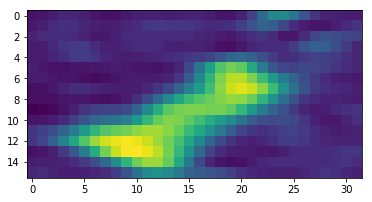

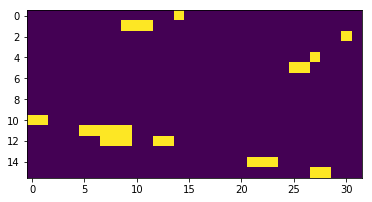

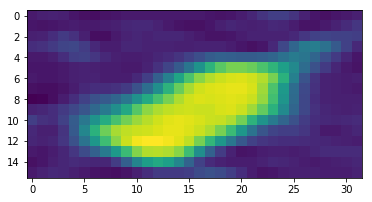

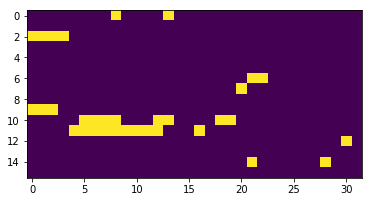

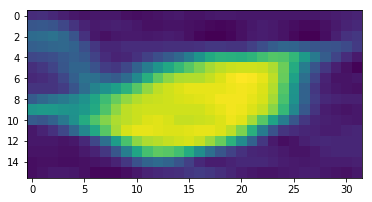

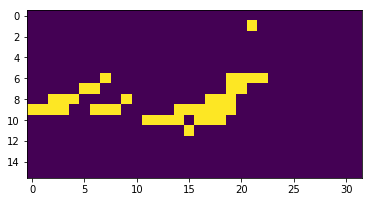

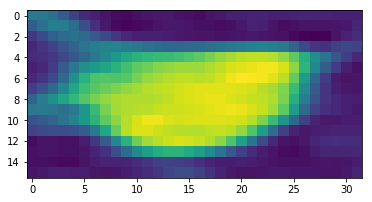

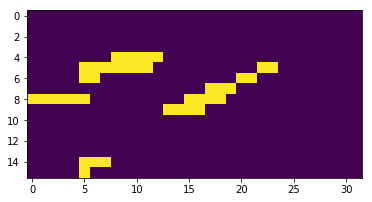

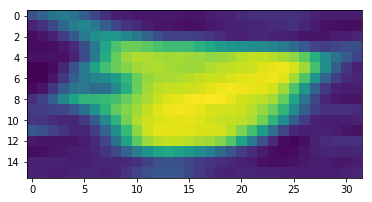

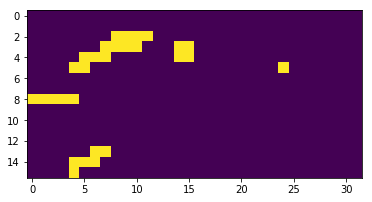

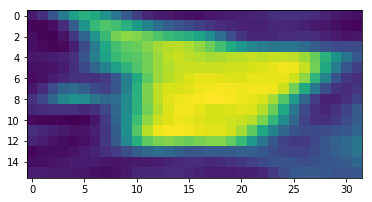

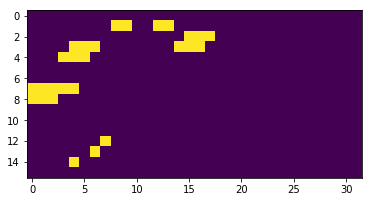

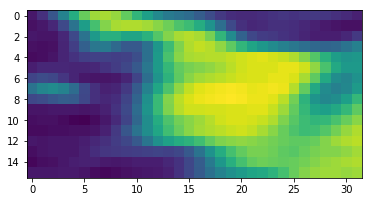

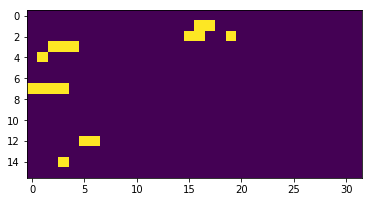

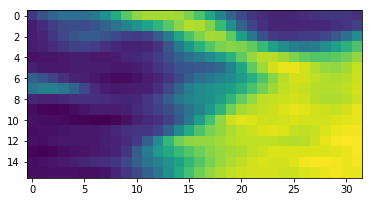

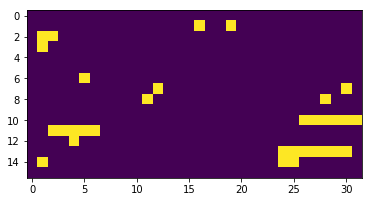

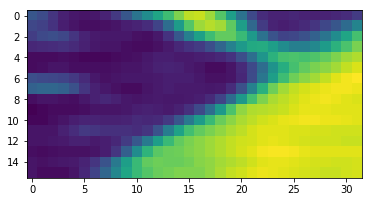

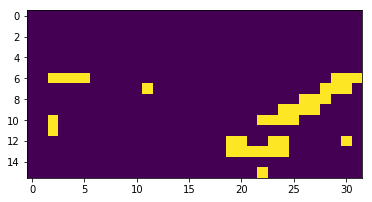

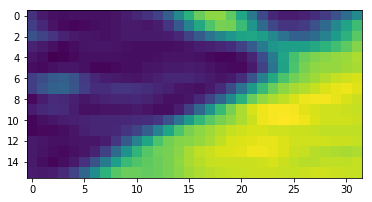

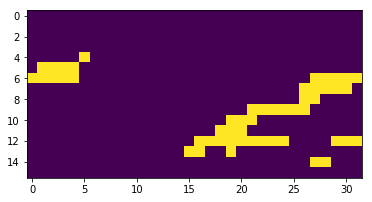

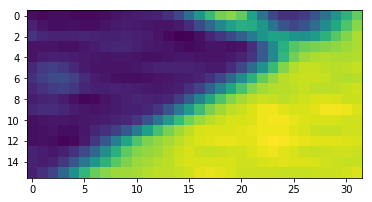

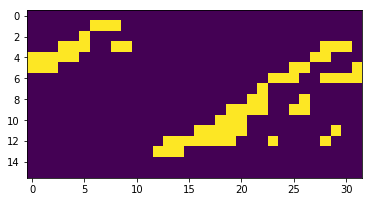

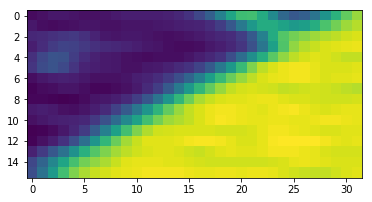

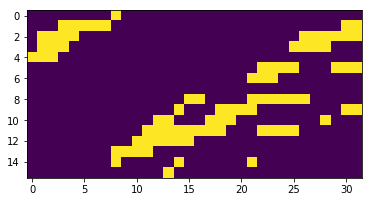

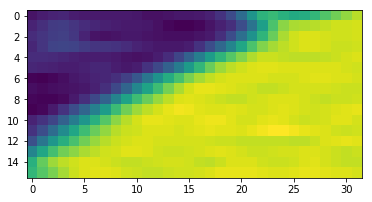

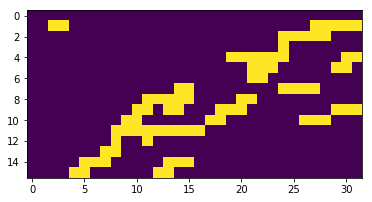

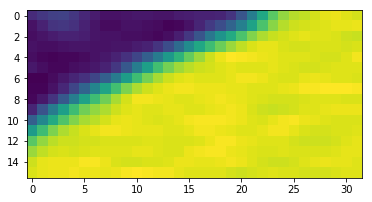

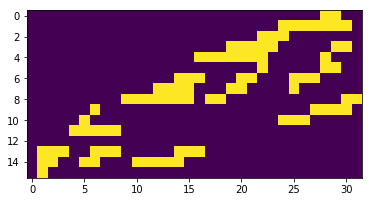

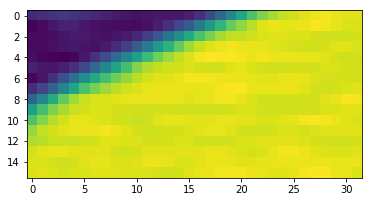

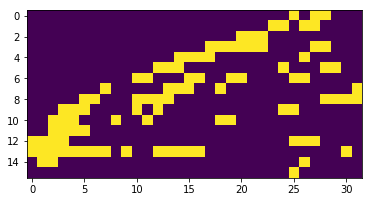

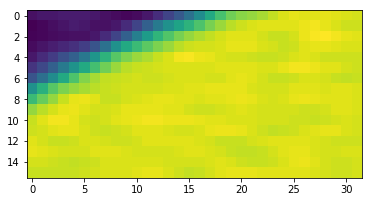

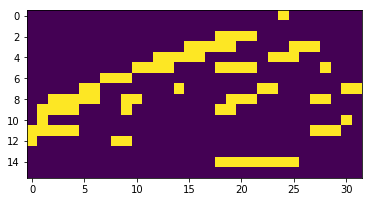

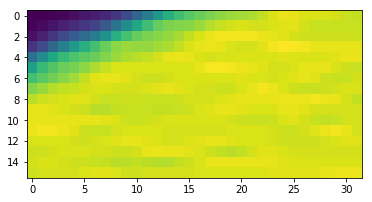

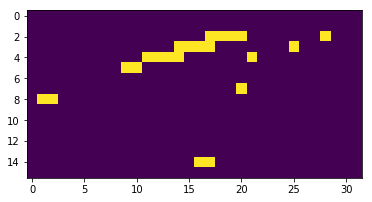

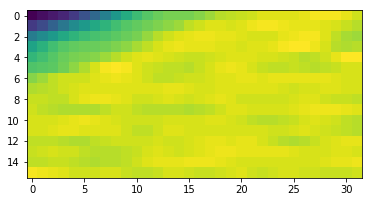

In [189]:
cand = np.zeros((cands[0].shape[0],cands[0].shape[1],cands[0].shape[2])) 
for i in range(6):
  cand = cand + cands[i][:,:,:]
cand[cand > 0] = 1
for i in range(32):
  plt.imshow(cand[:,i,:])
  plt.show()
  plt.clf()
  plt.imshow(img[:,i,:])
  plt.show()
  plt.clf()